In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict

In [2]:
# DA = 'data analyst'
# DS = 'data scientist'
# DE = 'data engineer'

# South Africa
sa_DA = pd.read_csv("sa_DA.csv")
sa_DS = pd.read_csv("sa_DS.csv")
sa_DE = pd.read_csv("sa_DE.csv")

# United States
us_DA = pd.read_csv("us_DA.csv")
us_DS = pd.read_csv("us_DS.csv")
us_DE = pd.read_csv("us_DE.csv")

# United Kingdom
uk_DA = pd.read_csv("uk_DA.csv")
uk_DS = pd.read_csv("uk_DS.csv")
uk_DE = pd.read_csv("uk_DE.csv")

# Australia
au_DA = pd.read_csv("au_DA.csv")
au_DS = pd.read_csv("au_DS.csv")
au_DE = pd.read_csv("au_DE.csv")

dataframes = [sa_DA, sa_DS, sa_DE,
              us_DA, us_DS, us_DE,
              uk_DA, uk_DS, uk_DE,
              au_DA, au_DS, au_DE]

In [3]:
# unfortunately the data from a glassdoor search quuery has duplicate job listings
# need to drop duplictate jobs: (job description is the best identifier)
counter = 0
for df in dataframes:
    if counter == 0: print("SA") 
    if counter == 3: print("\nUS")
    if counter == 6: print("\nUK")
    if counter == 9: print("\nAU")
    counter += 1
    print(str(counter)+": ",len(df["Job Description"]),"(original)",
          len(df.drop_duplicates(subset="Job Description")),"(dropped)")

SA
1:  78 (original) 76 (dropped)
2:  220 (original) 214 (dropped)
3:  790 (original) 709 (dropped)

US
4:  1000 (original) 720 (dropped)
5:  1000 (original) 673 (dropped)
6:  800 (original) 551 (dropped)

UK
7:  785 (original) 646 (dropped)
8:  1000 (original) 699 (dropped)
9:  800 (original) 622 (dropped)

AU
10:  1000 (original) 160 (dropped)
11:  468 (original) 168 (dropped)
12:  800 (original) 157 (dropped)


In [4]:
for df in dataframes:
    df.drop_duplicates(subset="Job Description", inplace=True)

In [5]:
# drop rows with nan values:
for df in dataframes:
    df = df.dropna(inplace = True)

In [6]:
# remove new line chars from job descriptions, company name
for df in dataframes:
    df["Job Description"] = df["Job Description"].str.replace("\n", " ")
    df["Company Name"] = df["Company Name"].str.replace("\n", " ")

In [7]:
# for the 'data engineer' search term, many software engineering and other jobs,
# not directly related to data science where scraped, need to drop these from df's
for df in dataframes:
    df = df[df["Job Title"].str.contains('|'.join(["Data", "data"]))]

In [8]:
techs = ["Python", "R", "Julia", "Java", "C", "Scala", "Bash", "PowerBi", "Tableau", "Excel", "VBA", "Macros","Alteryx", 
         "Spotfire", "Qlik", "Looker", "SAS", "ERP", "SAP", "MS Navision", "SAGE", "AccPac", "SQL", "Sql", "NoSql", "NoSQL", 
         "MongoDB", "Postgres", "PostgreSQL", "mySQL", "XML", "HTML", "CSS", "Javascript", "Hadoop", "Spark", "PySpark", 
         "SparkR", "Kafka", "ETL", "Oracle", "Storm", "AWS", "Cassandra", "Azkaban", "Airflow", "Luigi", "MATLAB", 
         "Snowflake", "BigQuery", "Azure", "GCP", "Perl", "Presto", "HBase", "Hive", "Druid", "Docker", "TensorFlow"]
pattern = "|".join(r"\b{}\b".format(x) for x in techs)

In [9]:
for df in dataframes:
    df["Technologies"] = df["Job Description"].str.findall(pattern, flags=re.I).str.join(", ").replace("", "Not found")

In [10]:
def get_degree_level(df):
    """
    Degree level
    """
 
    result = []
    for row in df["Job Description"]:
        try:
            jd = row.split(" ")
            if "bachelors" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "Bachelors" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "bachelor" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "Bachelor" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "bachelor's" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "Bachelor's" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            if "master's" in map(lambda x: x.lower(), jd):   
                result.append(["masters"])
            elif "Master's" in map(lambda x: x.lower(), jd):                       
                result.append(["masters"])
            elif "masters" in map(lambda x: x.lower(), jd):                       
                result.append(["masters"])
            elif "Masters" in map(lambda x: x.lower(), jd):                       
                result.append(["masters"])
            if "phd" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "Phd" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "Ph.D" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "PH.D" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "doctorate" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            else: continue
                
        except: continue
            
    return result

In [11]:
def get_degree_major(df):
    """
    Degree major (type)
    """
    
    # add two word majors
    majors_short = ["astronomy", "aeronautics", "biology", "business", "bioinformatics", 
                    "biostatistics", "chemistry", "economics", "engineering", "epidemiology",  
                    "finance", "maths", "mathematics", "informatics", "IT", "marketing", 
                    "physics", "statistics", "quantititive"]
    majors_long = ["computer science", "data science", "actuarial science"]
    
    DTEST = defaultdict(int)
    result = []
    
    for row in df["Job Description"]:
        try:
            if "degree" in row.lower():
                subset = row.split("degree")[1]
                for major in majors_short:
                    if major in subset:
                        result.append(major)
                for major in majors_long:
                    if major in subset:
                        result.append(major)
        
        except: continue
            
    return result

## Part A: Job Title Insights

In [12]:
def plotTechCount(df): 
    """
    Counts and plots "Technologies"
    """
    
    tech_count = defaultdict(int)
    for item in df["Technologies"]:
        names = item.split(", ")
        for name in names:
            tech_count[name] += 1
    
    tech_count_sorted = {k: v for k, v in sorted(tech_count.items(), key=lambda item: item[1], reverse=True)}
    keys = list(tech_count_sorted.keys())
    values = [tech_count_sorted[k] for k in keys]
    
    sns.set_style("darkgrid")
    sns.barplot(x=keys[:30], y=values[:30]).set_xticklabels(labels = keys[:30], rotation=70)
    plt.ylabel("Count", size = 14)

In [13]:
def plotDegreeType(df): 
    """
    Plots degree types
    """
    
    deg_type_count = defaultdict(int)
    for word in get_degree_major(df):
        deg_type_count[word] += 1

    deg_type_count_sort = {k: v for k, v in sorted(deg_type_count.items(), key=lambda item: item[1], reverse=True)}
    
    keys = list(deg_type_count_sort.keys())
    vals = [deg_type_count_sort[k] for k in keys]
    sns.barplot(x = keys, y = vals).set_xticklabels(labels = keys, rotation= 75)
    plt.ylabel("Count", size = 14)

In [75]:
def return_dt_k_and_v(df):
    deg_type_count = defaultdict(int)

    for i in get_degree_major(df):
        #for word in l:
        deg_type_count[i] += 1

    deg_type_count_sort = {k: v for k, v in sorted(deg_type_count.items(), key=lambda item: item[1], reverse=True)}
    keys = list(deg_type_count_sort.keys())
    vals = [deg_type_count_sort[k] for k in keys]
    
    return keys, vals

In [76]:
def return_dl_k_and_v(df): 
    
    deg_level_count = defaultdict(int)

    for l in get_degree_level(df):
        for word in l:
            deg_level_count[word] += 1

    deg_level_count_sort = {k: v for k, v in sorted(deg_level_count.items(), key=lambda item: item[1], reverse=True)}
    keys = list(deg_level_count_sort.keys())
    vals = [deg_level_count_sort[k] for k in keys]
    
    return keys, vals

In [15]:
# can remove this...
def plotDegreeLevel(df): 
    """
    Plots degree levels
    """
    
    deg_level_count = defaultdict(int)

    for l in get_degree_level(df):
        for word in l:
            deg_level_count[word] += 1

    deg_level_count_sort = {k: v for k, v in sorted(deg_level_count.items(), key=lambda item: item[1], reverse=True)}
    
    keys, vals = return_dl_k_and_v(df)
    sns.barplot(x = keys, y = vals).set_xticklabels(labels = keys, rotation= 45)
    plt.ylabel("Count", size = 14)
    plt.title("Degree Level:", size=16, weight = "bold");

### i. Data Analyst

#### Degrees:

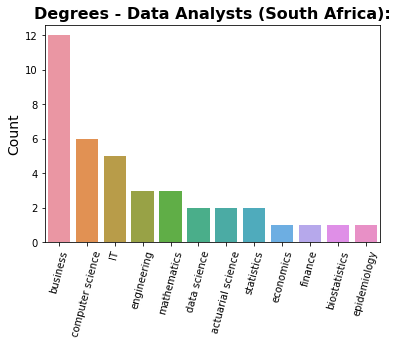

In [16]:
plotDegreeType(sa_DA)
plt.title("Degrees - Data Analysts (South Africa):", size=16, weight = "bold");

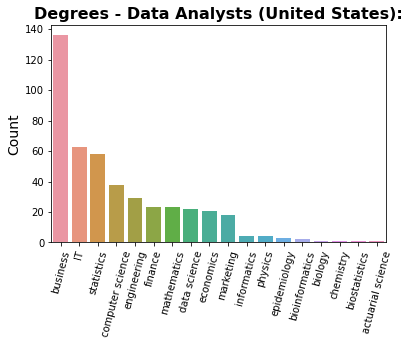

In [17]:
plotDegreeType(us_DA)
plt.title("Degrees - Data Analysts (United States):", size=16, weight = "bold");

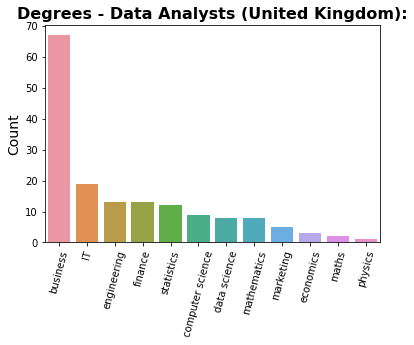

In [18]:
plotDegreeType(uk_DA)
plt.title("Degrees - Data Analysts (United Kingdom):", size=16, weight = "bold");

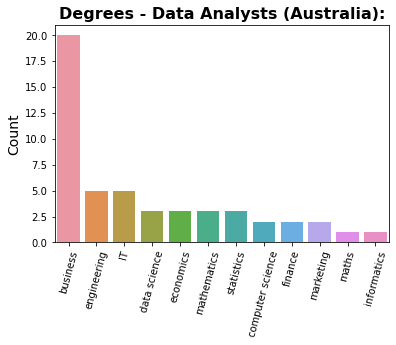

In [19]:
plotDegreeType(au_DA)
plt.title("Degrees - Data Analysts (Australia):", size=16, weight = "bold");

As seen above, data analyst positions commonly require a **business** related degree. Other notable types include **engineering, computer science, IT, mathematics, statistics, and data science** degrees.

In [77]:
# TEST
def plotRoleDegreeTypes(role):
    """
    Plots a 1 x 4 subplot showing degree types for a given role.
    
    Args: takes df's for a given role (data analyst, scientist or engineer) in all 4 countries
    """
    fig, ax = plt.subplots(1, 4)
    
    to_do_list_A = [sa_DA, us_DA, uk_DA, au_DA]
    to_do_list_S = [sa_DS, us_DS, uk_DS, au_DS]
    to_do_list_E = [sa_DE, us_DE, uk_DE, au_DE]
    
    list_used = None
    
    if role == "analyst":
        list_used = to_do_list_A
    elif role == "scientist":
        list_used = to_do_list_S
    elif role == "engineer":
        list_used = to_do_list_E
    else: return None

    colors = ["tab:olive", "tab:green", "tab:blue", "tab:orange"]
    titles = ["South Africa", "United States", "United Kingdom", "Australia"]
    
    item_number = 0
    
    for df in list_used:
        keys, vals = return_dt_k_and_v(df)
        
        ax[item_number].bar(keys, vals, color = colors[item_number])
        ax[item_number].set_xlabel(titles[item_number], fontsize = 14, fontweight = "bold")

        item_number += 1
        
    fig.autofmt_xdate(rotation= 45)
    fig.set_figheight(6)
    fig.set_figwidth(10)
    fig;

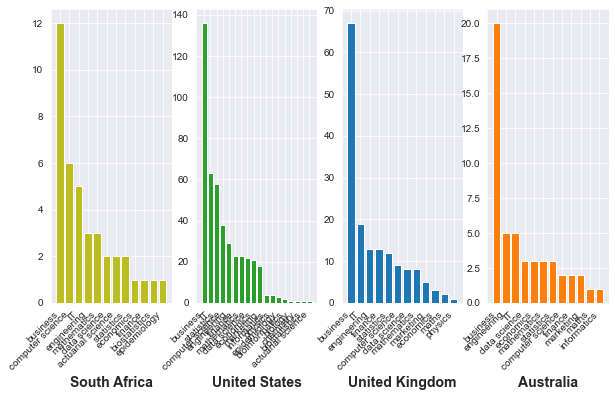

In [78]:
plotRoleDegreeTypes("analyst")

#### Degree Levels:

In [62]:
def plotRoleDegreeLevels(role):
    """
    Plots a 1 x 4 subplot showing degree levels for a given role.
    
    Args: takes df's for a given role (data analyst, scientist or engineer) in all 4 countries
    """
    fig, ax = plt.subplots(1, 4)
    
    to_do_list_A = [sa_DA, us_DA, uk_DA, au_DA]
    to_do_list_S = [sa_DS, us_DS, uk_DS, au_DS]
    to_do_list_E = [sa_DE, us_DE, uk_DE, au_DE]
    
    list_used = None
    
    if role == "analyst":
        list_used = to_do_list_A
    elif role == "scientist":
        list_used = to_do_list_S
    elif role == "engineer":
        list_used = to_do_list_E
    else: return None

    colors = ["tab:olive", "tab:green", "tab:blue", "tab:orange"]
    titles = ["South Africa", "United States", "United Kingdom", "Australia"]
    
    item_number = 0
    
    for df in list_used:
        keys, vals = return_dl_k_and_v(df)
        
        ax[item_number].bar(keys, vals, color = colors[item_number])
        ax[item_number].set_xlabel(titles[item_number], fontsize = 14, fontweight = "bold")

        item_number += 1
        
    fig.autofmt_xdate(rotation= 45)
    fig.set_figheight(6)
    fig.set_figwidth(10)
    fig;

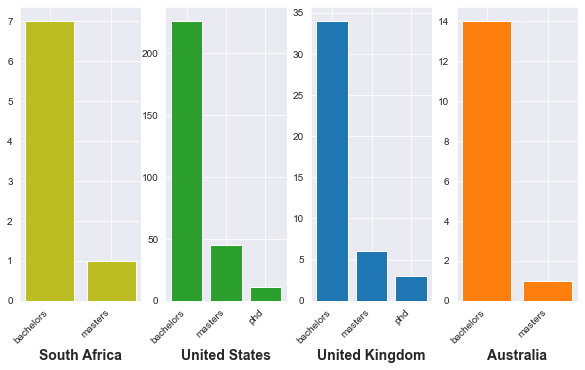

In [63]:
plotRoleDegreeLevels("analyst")

concl

#### Tools & Technologies:

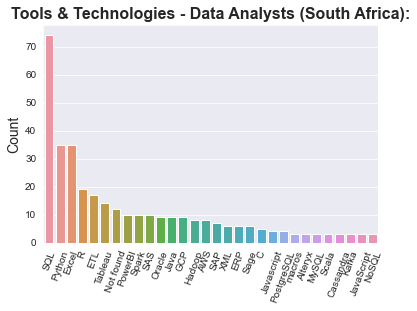

In [22]:
# remove "Not found"
plotTechCount(sa_DA)
plt.title("Tools & Technologies - Data Analysts (South Africa):", size=16, weight = "bold");

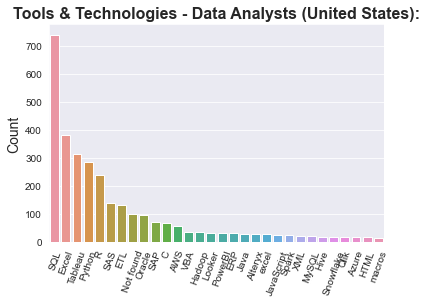

In [23]:
plotTechCount(us_DA)
plt.title("Tools & Technologies - Data Analysts (United States):", size=16, weight = "bold");

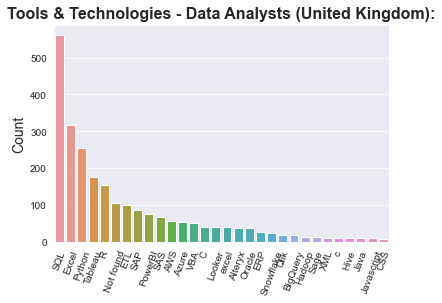

In [24]:
plotTechCount(uk_DA)
plt.title("Tools & Technologies - Data Analysts (United Kingdom):", size=16, weight = "bold");

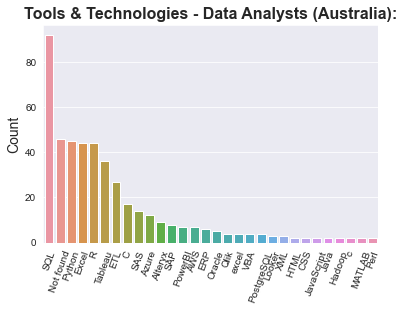

In [25]:
plotTechCount(au_DA)
plt.title("Tools & Technologies - Data Analysts (Australia):", size=16, weight = "bold");

For data analysts, the most in demand skills across all 4 countries are **SQL, R, Python, Excel, Tableau**. Interestingly, Tableau seems to be significanly more favoured than Power BI as a visualisation tool. This is interesting since Power BI desktop is free contains full functionality whereas Tableau desktop is more limited. Perhaps most companies have invested the capital into Tableau software due to its highly regarded visualisation capabilities. ETL tools are also a common requirement. Big data technologies are not in high demand for this role.

### ii. Data Scientist

#### Degrees:

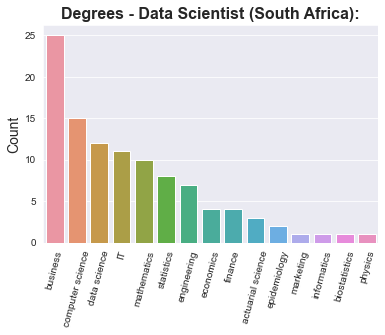

In [26]:
plotDegreeType(sa_DS)
plt.title("Degrees - Data Scientist (South Africa):", size=16, weight = "bold");

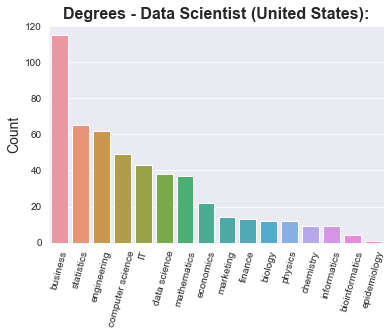

In [27]:
plotDegreeType(us_DS)
plt.title("Degrees - Data Scientist (United States):", size=16, weight = "bold");

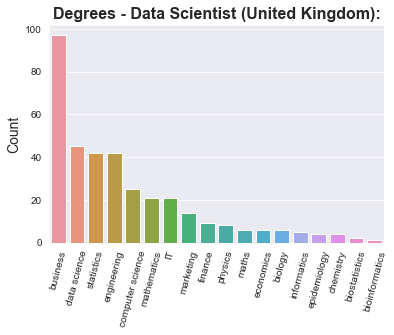

In [28]:
plotDegreeType(uk_DS)
plt.title("Degrees - Data Scientist (United Kingdom):", size=16, weight = "bold");

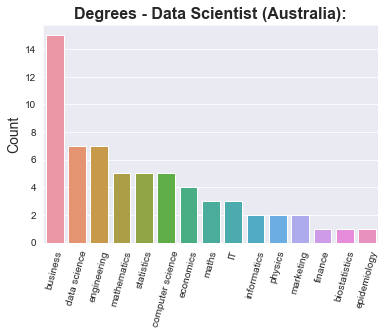

In [29]:
plotDegreeType(au_DS)
plt.title("Degrees - Data Scientist (Australia):", size=16, weight = "bold");

The most common degrees for data scientist roles are **business, data science, statistics, engineering, mathematics, computer science and IT**.

#### Degree Levels:

In [30]:
# insert code here

#### Tools & Technologies:

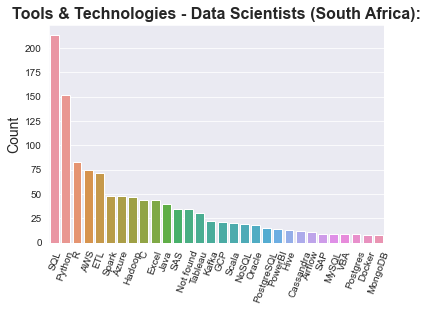

In [31]:
plotTechCount(sa_DS)
plt.title("Tools & Technologies - Data Scientists (South Africa):", size=16, weight = "bold");

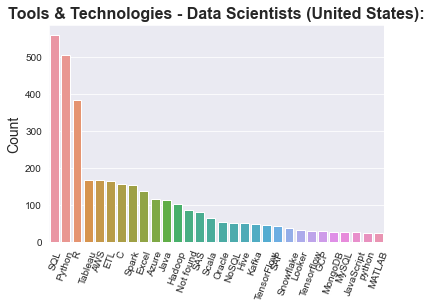

In [32]:
plotTechCount(us_DS)
plt.title("Tools & Technologies - Data Scientists (United States):", size=16, weight = "bold");

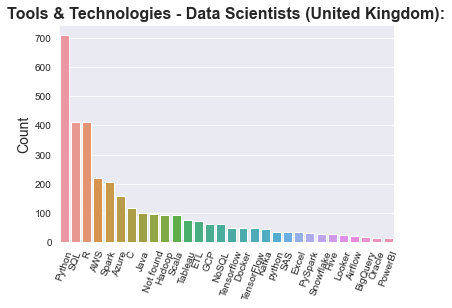

In [33]:
plotTechCount(uk_DS)
plt.title("Tools & Technologies - Data Scientists (United Kingdom):", size=16, weight = "bold");

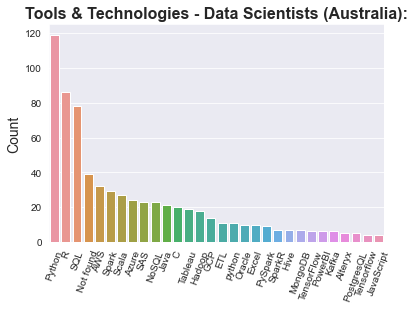

In [34]:
plotTechCount(au_DS)
plt.title("Tools & Technologies - Data Scientists (Australia):", size=16, weight = "bold");

**Python** appears to be favoured over **R** with R coming in second. Perhaps since Python is more of a general purpose programming language. **SQL** is a staple and other important technologies include **AWS, and big data technologies** are also key for data scientist roles across all 4 countries.

### iii. Data Engineer

#### Degrees:

In [35]:
# insert code here

#### Degree Levels:

In [36]:
# insert code here

#### Tools & Technologies:

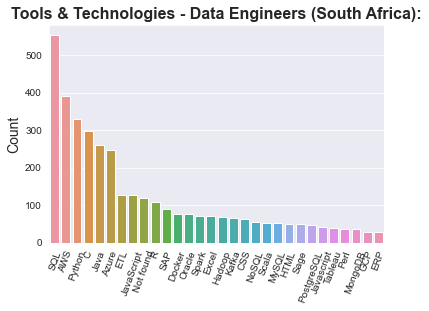

In [37]:
plotTechCount(sa_DE)
plt.title("Tools & Technologies - Data Engineers (South Africa):", size=16, weight = "bold");

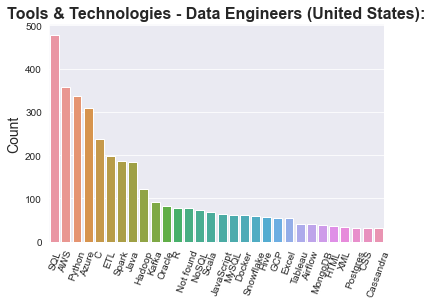

In [38]:
plotTechCount(us_DE)
plt.title("Tools & Technologies - Data Engineers (United States):", size=16, weight = "bold");

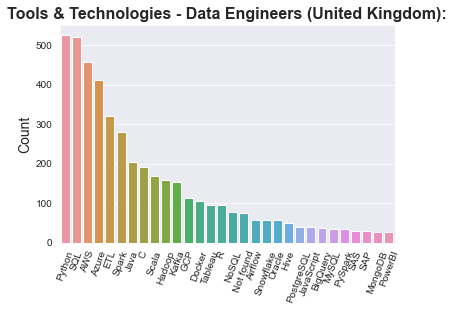

In [56]:
plotTechCount(uk_DE)
plt.title("Tools & Technologies - Data Engineers (United Kingdom):", size=16, weight = "bold");

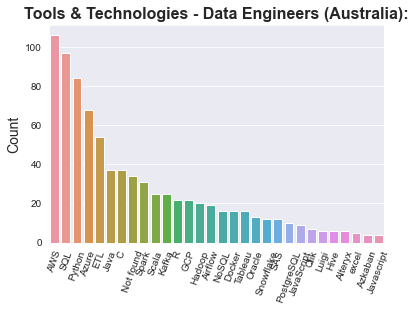

In [40]:
plotTechCount(au_DE)
plt.title("Tools & Technologies - Data Engineers (Australia):", size=16, weight = "bold");

**AWS, SQL, Python (also Java and C), Azure, ETL tools as well as other big data techs** are key for data engineering roles across all 4 countries.

## Part B: Location Insights

In [41]:
def plotJobLocation(df): 
    """
    Plots top 10 job posting locations
    """
    sns.catplot(data = df, x = "Location", kind = "count", 
                order=df["Location"].value_counts().iloc[:10].index).set_xticklabels(rotation=65)
    plt.ylabel("Count", size = 12)

### i. South Africa:

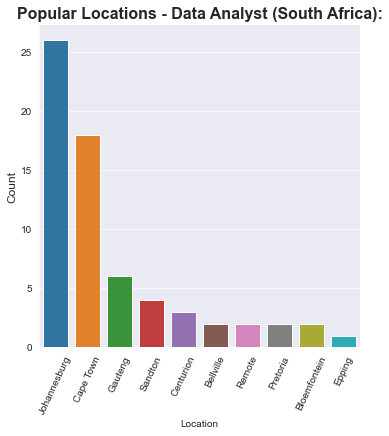

In [42]:
plotJobLocation(sa_DA)
plt.title("Popular Locations - Data Analyst (South Africa):", size=16, weight = "bold");

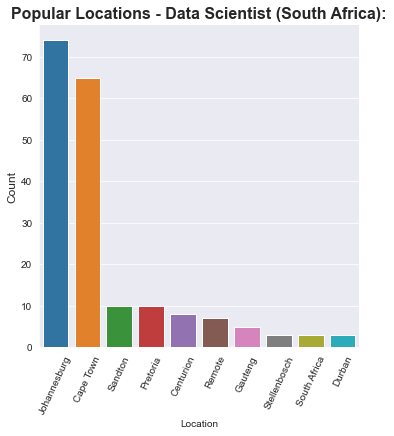

In [43]:
plotJobLocation(sa_DS)
plt.title("Popular Locations - Data Scientist (South Africa):", size=16, weight = "bold");

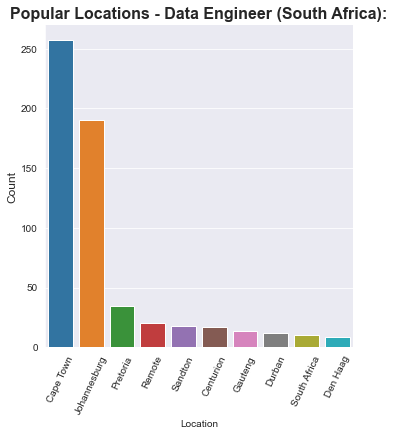

In [44]:
plotJobLocation(sa_DE)
plt.title("Popular Locations - Data Engineer (South Africa):", size=16, weight = "bold");

For **all 3 roles**, most are found in **Cape Town** and **Johannesburg (Gauteng)**.

### ii. United States

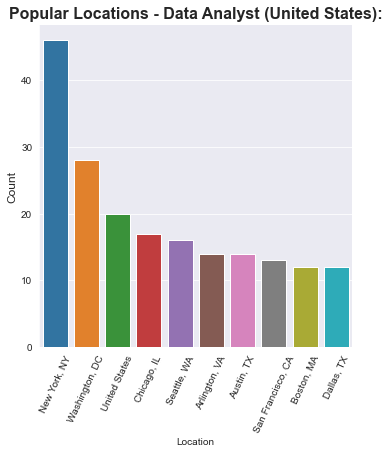

In [45]:
plotJobLocation(us_DA)
plt.title("Popular Locations - Data Analyst (United States):", size=16, weight = "bold");

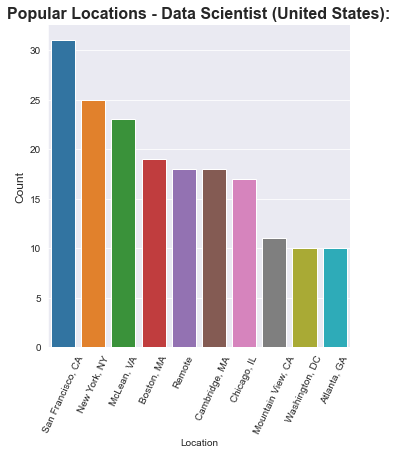

In [46]:
plotJobLocation(us_DS)
plt.title("Popular Locations - Data Scientist (United States):", size=16, weight = "bold");

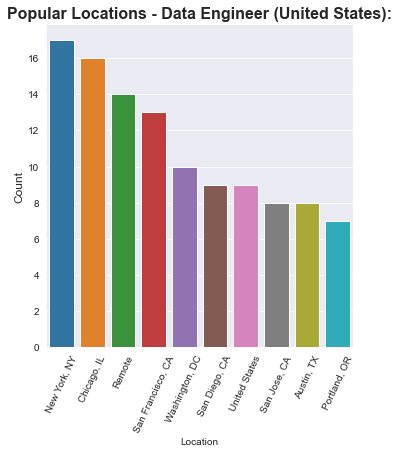

In [47]:
plotJobLocation(us_DE)
plt.title("Popular Locations - Data Engineer (United States):", size=16, weight = "bold");

For **data analyst and data scientist** roles, **New York and Chicago** had the most postings, **New York being significantly higher though**. For **data engineering** roles, New York and Chicago had the most listings but the **differences were relatively insignificant**. Remote jobs are also popular (this is likely inflated due to the data being collected during COVID-19 where the situation necessitated remote work).

### iii. United Kingdom

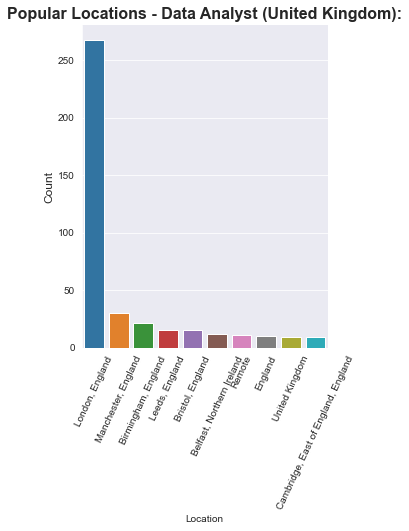

In [48]:
plotJobLocation(uk_DA)
plt.title("Popular Locations - Data Analyst (United Kingdom):", size=16, weight = "bold");

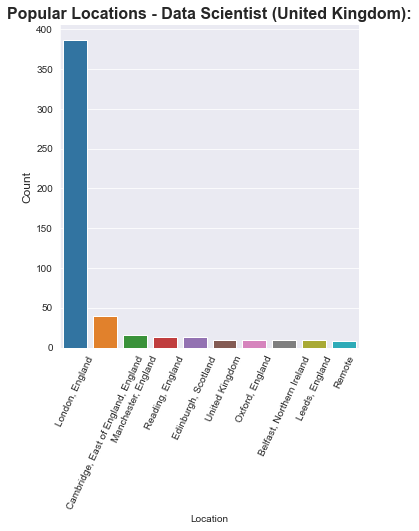

In [49]:
plotJobLocation(uk_DS)
plt.title("Popular Locations - Data Scientist (United Kingdom):", size=16, weight = "bold");

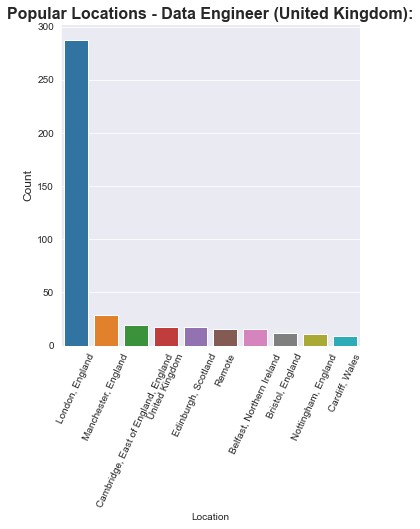

In [50]:
plotJobLocation(uk_DE)
plt.title("Popular Locations - Data Engineer (United Kingdom):", size=16, weight = "bold");

**All 3 roles** show that **London has by far the most** listings. This is most likely since it known as one of the largest international 'tech hubs'.

### iv. Australia

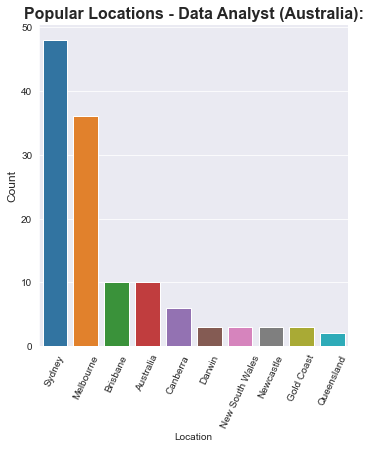

In [51]:
plotJobLocation(au_DA)
plt.title("Popular Locations - Data Analyst (Australia):", size=16, weight = "bold");

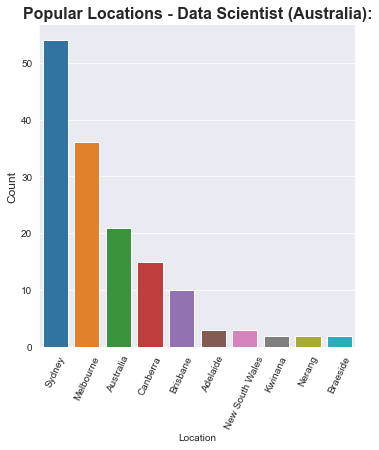

In [52]:
plotJobLocation(au_DS)
plt.title("Popular Locations - Data Scientist (Australia):", size=16, weight = "bold");

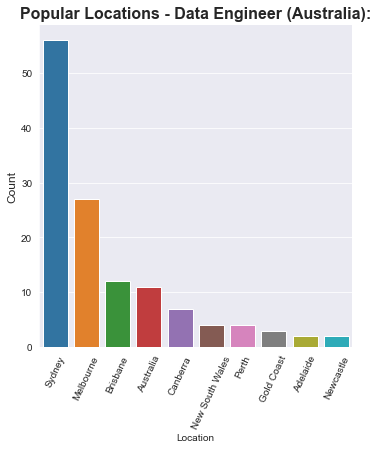

In [53]:
plotJobLocation(au_DE)
plt.title("Popular Locations - Data Engineer (Australia):", size=16, weight = "bold");

**All 3 roles** indicate **Sydney and Melbourne** have the most listings. Brisbane is also relatively high for each role.

#### Extra:

In [54]:
# consider subplots for more than degree level - enlarged size to compensate

In [55]:
# NMF